# 1 Задание
Для загрузки библиотек cuDF и cuML использовал собственный скрипт

In [ ]:
import locale

!conda install -c rapidsai -c nvidia -c conda-forge cudf=23.06 python=3.8 cudatoolkit=11.2

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
print(locale.getpreferredencoding())

!pip install --extra-index-url=https://pypi.nvidia.com cuml-cu12==24.4.*

/bin/bash: line 1: conda: command not found
UTF-8
Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 GB 811.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 473.3/473.3 MB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.6/126.6 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.0/823.0 MB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 MB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 80.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 79.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 810.9/810.9 kB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 66.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.7/161.7 kB 16.7 MB/s eta 0:0

In [ ]:
import cudf, cuml

# 2 Задание

C помощью PANDAS создайте датафрейм df из 1 млн. строк, содержащий 4 столбца – пол, возраст, доход, профессия. В категориальной переменной профессия сделайте 3-4 категории, в переменной пол – 2, возраст и доход сделайте количественными, с типом INT. Для генерации этих столбцов используйте методы NP.RANDOM.NORMAL, NP.RANDOM.CHOICE. Сохраните этот датафрейм на диск, в виде файла  CSV, без индекса. Замерьте скорость создания датафрейма и скорость записи, с помощью «магической» команды  %%TIMEIT.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
%%timeit

n = 1_000_000

data = pd.DataFrame({
    'sex': np.random.choice(['Муж', 'Жен'], size = n),
    'age': np.random.normal(41, 8, size=n),
    'income': np.random.normal(loc=20000, scale=1500, size = n),
    'profession': np.random.choice(['дворник', 'уборщик', 'няня', 'кассир'], size=n)
})

505 ms ± 86.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
n = 1_000_000

data = pd.DataFrame({
    'sex': np.random.choice(['Муж', 'Жен'], size = n),
    'age': np.random.normal(41, 8, size=n),
    'income': np.random.normal(loc=20000, scale=1500, size = n),
    'profession': np.random.choice(['дворник', 'уборщик', 'няня', 'кассир'], size=n)
})

In [ ]:
data.to_csv('data.csv', index=False, encoding='utf-8')

In [ ]:
%%timeit

data.to_csv('data.csv', index=False)

3.56 s ± 487 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

data = pd.read_csv('data.csv')

913 ms ± 202 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 3 Задание

Создайте датафрейм cdf1 с помощью библиотеки cuDF из полученного  CSV файла и замерьте скорость  чтения, с помощью «магической» команды  %%TIMEIT.

In [ ]:
cdf1 = cudf.read_csv('data.csv')

In [ ]:
%%timeit
cdf1 = cudf.read_csv('data.csv')

33.5 ms ± 651 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 4 Задание

Создайте датафрейм cdf2 с помощью библиотеки cuDF из имеющегося датафрейма df и замерьте скорость  создания, с помощью «магической» команды  %%TIMEIT.

In [ ]:
cdf2 = cudf.DataFrame(data)

In [ ]:
%%timeit

cdf2 = cudf.DataFrame(data)

194 ms ± 23.8 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


# 5 Задание

Создайте 100 пропущенных значений в столбцах df и cdf2. Замените эти пропущенные значения средними, по двум соседним известным значения (предыдущим известным, и следующим известным). Замерьте скорость выполнения операций с помощью «магической» команды  %%TIMEIT.

In [ ]:
missing_indices = np.random.choice(data.index, size=100, replace=False)

data.loc[missing_indices, 'income'] = np.nan

def fill_missing(df):
    df['income'] = df['income'].interpolate(method='linear', limit_direction='both')

%timeit fill_missing(data)
%timeit fill_missing(cdf2)

3.92 ms ± 275 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
899 µs ± 131 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
fill_missing(data)
fill_missing(cdf2)

# 6 Задание

В качестве агрегации надо рассчитать средний возраст, максимальный доход, самый частый пол, самый редкий тип профессии. Замерьте время выполнения этих операций с помощью «магической» команды  %%TIMEIT для датафрейма df, и cdf2.

In [ ]:
%%timeit

avg_age = data['age'].mean()
max_income = data['income'].max()
most_common_sex = data['sex'].mode().iloc[0]
rarest_profession = data['profession'].value_counts().idxmin()

151 ms ± 38.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
%%timeit

avg_age = cdf2['age'].mean().item()
max_income = cdf2['income'].max().item()
most_common_gender = cdf2['sex'].mode().iloc[0]
rarest_profession = cdf2['profession'].value_counts().index[-1]

15.7 ms ± 1.49 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


# 7 Задание

Создайте сводные таблицы

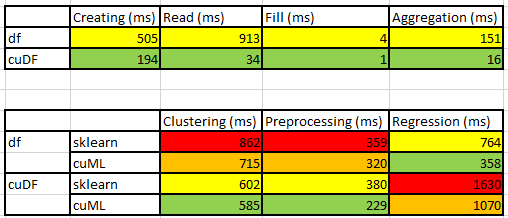

# 8 Задание

Кластеризуйте df и cdf2 на 3 кластера, с помощью метода KMeans из sklearn cuML. Эксперимент должен проводиться в виде модель-структура данных, т.е. для 4-х вариантов комбинации библиотеки(обычной и на основе cuML) и датафрейма (обычного или на основе cuDF). . Замерьте время выполнения этих операций с помощью «магической» команды  %%TIMEIT

In [ ]:
from sklearn.cluster import KMeans as skKMeans
from cuml.cluster import KMeans as cuKMeans

In [ ]:
sex_mapping = {'Муж': 0, 'Жен': 1}
profession_mapping = {'уборщик': 0, 'дворник': 1, 'кассир': 2, 'няня': 3}

data['sex'] = data['sex'].map(sex_mapping)
data['profession'] = data['profession'].map(profession_mapping)

cdf2['sex'] = cdf2['sex'].map(sex_mapping)
cdf2['profession'] = cdf2['profession'].map(profession_mapping)

In [ ]:
# data + sklearn
model_sk_data = skKMeans(n_clusters=3, random_state=1234)
clusters = model_sk_data.fit_predict(data)
data['cluster'] = clusters
data_sk = data.copy()

# cdf2 + sklearn
model_sk_cdf2 = skKMeans(n_clusters=3, random_state=1234)
clusters = model_sk_cdf2.fit_predict(cdf2.to_pandas())
cdf2['cluster'] = cudf.Series(clusters)
cdf2_sk = cdf2.copy()

# data + cuml
model_cu_data = cuKMeans(n_clusters=3, random_state=1234)
clusters = model_cu_data.fit_predict(cudf.DataFrame.from_pandas(data))
data['cluster'] = clusters.to_pandas()
data_cu = data.copy()

# cdf2 + cuml
model_cu_cdf2 = cuKMeans(n_clusters=3, random_state=1234)
clusters = model_cu_cdf2.fit_predict(cdf2)
cdf2['cluster'] = clusters
cdf2_cu = cdf2.copy()

In [ ]:
%%timeit

model_sk_data = skKMeans(n_clusters=3, random_state=1234)
clusters = model_sk_data.fit_predict(data)
data['cluster'] = clusters
data_sk = data.copy()

862 ms ± 174 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

model_sk_cdf2 = skKMeans(n_clusters=3, random_state=1234)
clusters = model_sk_cdf2.fit_predict(cdf2.to_pandas())
cdf2['cluster'] = cudf.Series(clusters)
cdf2_sk = cdf2.copy()

715 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

model_cu_data = cuKMeans(n_clusters=3, random_state=1234)
clusters = model_cu_data.fit_predict(data)
data['cluster'] = clusters
data_cu = data.copy()

602 ms ± 4.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit

model_cu_cdf2 = cuKMeans(n_clusters=3, random_state=1234)
clusters = model_cu_cdf2.fit_predict(cdf2)
cdf2['cluster'] = clusters
cdf2_cu = cdf2.copy()

585 ms ± 1.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# 9 Задание

Преобразуйте признаки, кроме дохода, включая номер кластера из п.8 в нормализованные от 0 до 1. Используйте минимаксное шкалирование и даммикодирование (one hot encoding). Эксперимент должен проводиться в виде модельструктура данных, т.е. для 4-х вариантов комбинации библиотеки(обычной и на основе cuML) и датафрейма (обычного или на основе cuDF). . Замерьте время выполнения этих операций с помощью «магической» команды  %%TIMEIT.

In [ ]:
from sklearn.preprocessing import OneHotEncoder as skOHE
from cuml.preprocessing import OneHotEncoder as cuOHE
from sklearn.preprocessing import MinMaxScaler as skMMS
from cuml.preprocessing import MinMaxScaler as cuMMS

In [ ]:
%%timeit
# data + sklearn
data_sk = data.copy()

scaler = skMMS()
one_hot_encoder = skOHE()

one_hot_columns = one_hot_encoder.fit_transform(data_sk[['sex','profession','cluster']]).toarray()
one_hot = pd.DataFrame(one_hot_columns,columns=one_hot_encoder.get_feature_names_out(['sex','profession','cluster']), index=data_sk.index)
data_sk = pd.concat([data_sk, one_hot], axis=1)

minmax = pd.DataFrame(scaler.fit_transform(data_sk[['age']]) ,columns=['age_m'], index=data_sk.index)
data_sk['age'] = minmax['age_m']

data_sk.drop(columns=['sex','profession','cluster'], inplace = True)

359 ms ± 20.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# cdf2 + sklearn
cdf2_sk = cdf2.copy()

scaler = skMMS()
one_hot_encoder = skOHE()

one_hot_columns = one_hot_encoder.fit_transform(cdf2_sk[['sex', 'profession', 'cluster']].to_pandas()).toarray()
one_hot = pd.DataFrame(one_hot_columns, columns=one_hot_encoder.get_feature_names_out(['sex', 'profession', 'cluster']),index=cdf2_sk.index.to_pandas())
cdf2_sk = cudf.concat([cdf2_sk, cudf.from_pandas(one_hot)], axis=1)
minmax = pd.DataFrame(scaler.fit_transform(cdf2_sk[['age']].to_pandas()),columns=['age_m'],index=cdf2_sk.index.to_pandas())
cdf2_sk['age'] = cudf.Series(minmax['age_m'])

cdf2_sk.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

320 ms ± 5.75 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# data + cuml
data_cu = data.copy()
scaler = cuMMS()
one_hot_encoder = cuOHE()

one_hot_columns = one_hot_encoder.fit_transform(data_cu[['sex', 'profession', 'cluster']]).toarray()
one_hot_col_names = ['sex_1', 'sex_0','profession_3','profession_0','profession_1','profession_2','cluster_1','cluster_0','cluster_2']
one_hot = pd.DataFrame(data=one_hot_columns.get(), columns=one_hot_col_names)
data_cu = pd.concat([data_cu, one_hot], axis=1)
age_scaled = scaler.fit_transform(data_cu[['age']])
data_cu['age'] = pd.Series(age_scaled, index=data_cu.index)

data_cu.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

380 ms ± 78.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# cdf2 + cuml

cdf2_cu = cdf2.copy()
scaler = cuMMS()
one_hot_encoder = cuOHE()

one_hot_columns = one_hot_encoder.fit_transform(cdf2_cu[['sex', 'profession', 'cluster']]).toarray()
one_hot_col_names = ['sex_1', 'sex_0','profession_3','profession_0','profession_1','profession_2','cluster_1','cluster_0','cluster_2']
one_hot = cudf.DataFrame(one_hot_columns,columns=one_hot_col_names)
cdf2_cu = cudf.concat([cdf2_cu, one_hot], axis=1)
cdf2_cu['age'] = cudf.Series(scaler.fit_transform(cdf2_cu[['age']]))

cdf2_cu.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

229 ms ± 7.79 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
# data + sklearn
data_sk = data.copy()

scaler = skMMS()
one_hot_encoder = skOHE()

one_hot_columns = one_hot_encoder.fit_transform(data_sk[['sex','profession','cluster']]).toarray()
one_hot = pd.DataFrame(one_hot_columns,columns=one_hot_encoder.get_feature_names_out(['sex','profession','cluster']), index=data_sk.index)
data_sk = pd.concat([data_sk, one_hot], axis=1)

minmax = pd.DataFrame(scaler.fit_transform(data_sk[['age']]) ,columns=['age_m'], index=data_sk.index)
data_sk['age'] = minmax['age_m']

data_sk.drop(columns=['sex','profession','cluster'], inplace = True)

# cdf2 + sklearn
cdf2_sk = cdf2.copy()

scaler = skMMS()
one_hot_encoder = skOHE()

one_hot_columns = one_hot_encoder.fit_transform(cdf2_sk[['sex', 'profession', 'cluster']].to_pandas()).toarray()
one_hot = pd.DataFrame(one_hot_columns, columns=one_hot_encoder.get_feature_names_out(['sex', 'profession', 'cluster']),index=cdf2_sk.index.to_pandas())
cdf2_sk = cudf.concat([cdf2_sk, cudf.from_pandas(one_hot)], axis=1)
minmax = pd.DataFrame(scaler.fit_transform(cdf2_sk[['age']].to_pandas()),columns=['age_m'],index=cdf2_sk.index.to_pandas())
cdf2_sk['age'] = cudf.Series(minmax['age_m'])

cdf2_sk.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

# data + cuml
data_cu = data.copy()
scaler = cuMMS()
one_hot_encoder = cuOHE()

one_hot_columns = one_hot_encoder.fit_transform(data_cu[['sex', 'profession', 'cluster']]).toarray()
one_hot_col_names = ['sex_1', 'sex_0','profession_3','profession_0','profession_1','profession_2','cluster_1','cluster_0','cluster_2']
one_hot = pd.DataFrame(data=one_hot_columns.get(), columns=one_hot_col_names)
data_cu = pd.concat([data_cu, one_hot], axis=1)
age_scaled = scaler.fit_transform(data_cu[['age']])
data_cu['age'] = pd.Series(age_scaled, index=data_cu.index)

data_cu.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

# cdf2 + cuml

cdf2_cu = cdf2.copy()
scaler = cuMMS()
one_hot_encoder = cuOHE()

one_hot_columns = one_hot_encoder.fit_transform(cdf2_cu[['sex', 'profession', 'cluster']]).toarray()
one_hot_col_names = ['sex_1', 'sex_0','profession_3','profession_0','profession_1','profession_2','cluster_1','cluster_0','cluster_2']
one_hot = cudf.DataFrame(one_hot_columns,columns=one_hot_col_names)
cdf2_cu = cudf.concat([cdf2_cu, one_hot], axis=1)
cdf2_cu['age'] = cudf.Series(scaler.fit_transform(cdf2_cu[['age']]))

cdf2_cu.drop(columns=['sex', 'profession', 'cluster'], inplace=True)

# 10 Задание

На основании признаков из п.9 постройте линейную регрессионную модель, предсказывающую доход, используя библиотеки sklearn и cuML. Эксперимент должен проводиться в виде модель-структура данных, т.е. для 4-х вариантов комбинации библиотеки(обычной и на основе cuML) и датафрейма (обычного или на основе cuDF). . Замерьте время выполнения этих операций с помощью «магической» команды  %%TIMEIT

In [ ]:
from sklearn.linear_model import LinearRegression as sklr
from cuml.linear_model import LinearRegression as culr
from sklearn.model_selection import train_test_split as sktt
from cuml.model_selection import train_test_split as cutt

In [ ]:
%%timeit
# data + sklearn
X = data_sk.drop(columns=['income']).values
y = data_sk['income'].values

X_train, X_test, y_train, y_test = sktt(X, y, test_size=0.2, shuffle=True)

model = sklr()
model.fit(X_train, y_train)

764 ms ± 169 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# cdf2 + sklearn
X = cdf2_sk.drop(columns=['income']).values
y = cdf2_sk['income'].values

X_train, X_test, y_train, y_test = sktt(X, y, test_size=0.2, shuffle=True)

model = sklr()
model.fit(X_train.get(), y_train.get())

358 ms ± 21.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# data + cuml
X = data_cu.drop(columns=['income']).values
y = data_cu['income'].values

X_train, X_test, y_train, y_test = sktt(X, y, test_size=0.2, shuffle=True)

model = culr()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)
/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either

1.63 s ± 376 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%%timeit
# cdf2 + cuml
X = cdf2_cu.drop(columns=['income']).values
y = cdf2_cu['income'].values

X_train, X_test, y_train, y_test = cutt(X, y, test_size=0.2, shuffle=True)

model = culr()
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/cuml/internals/api_decorators.py:382: UserWarning: Starting from version 23.08, the new 'copy_X' parameter defaults to 'True', ensuring a copy of X is created after passing it to fit(), preventing any changes to the input, but with increased memory usage. This represents a change in behavior from previous versions. With `copy_X=False` a copy might still be created if necessary. Explicitly set 'copy_X' to either True or False to suppress this warning.
  return init_func(self, *args, **filtered_kwargs)


1.07 s ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
